# Project: Wrangling and Analyze Data

##  Three pieces of data for this project 

### 1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [95]:
#importing necessary packages
import pandas as pd
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
#reading the dataset
df_twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')

In [29]:
#creating a copy of the dataframe
df_twitter_archive_copy = df_twitter_archive.copy()

In [30]:
#display data distribution inside the dataset
df_twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [303]:
#display the last three records in the dataset
df_twitter_archive_copy.tail(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [277]:
#see the statistical distribution of data
df_twitter_archive_copy.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


### 2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [45]:
# Loading the dataset from the url given to the dataframe
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
df_image_predictions=pd.read_csv(url ,sep="\t")

In [46]:
#view data distribution
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [47]:
#download dataset to the working ditrectory in my local computer
df_image_predictions.to_csv('image-predictions.tsv',sep="\t")

In [48]:
#reading the downloaded dataset to a dataframe
df_image_predictions_local=pd.read_csv('image-predictions.tsv', sep="\t")

In [49]:
# create a copy of the dataset
df_image_predictions_copy=df_image_predictions_local.copy()

In [324]:
#display data distribution inside the dataset
df_image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2075 non-null   int64  
 1   tweet_id    2075 non-null   int64  
 2   jpg_url     2075 non-null   object 
 3   img_num     2075 non-null   int64  
 4   p1          2075 non-null   object 
 5   p1_conf     2075 non-null   float64
 6   p1_dog      2075 non-null   bool   
 7   p2          2075 non-null   object 
 8   p2_conf     2075 non-null   float64
 9   p2_dog      2075 non-null   bool   
 10  p3          2075 non-null   object 
 11  p3_conf     2075 non-null   float64
 12  p3_dog      2075 non-null   bool   
dtypes: bool(3), float64(3), int64(3), object(4)
memory usage: 168.3+ KB


In [50]:
#display first three rows in the dataset
df_image_predictions_copy.head(3)

,Unnamed: 0,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [51]:
#display statistical data distribution inside the dataset
df_image_predictions_copy.describe()

,Unnamed: 0,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2075.000000,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,1037.000000,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,599.145224,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,0.000000,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,518.500000,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,1037.000000,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,1555.500000,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,2074.000000,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### 3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [9]:
#reading data from the dataset
df_tweet_json = pd.read_json('tweet-json.txt', lines=True)

In [10]:
#creating a copy of the dataset
df_tweet_json_copy = df_tweet_json.copy()

In [11]:
#display data distribution inside the dataset
df_tweet_json_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [12]:
#display statistical data distribution inside the dataset
df_tweet_json_copy.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [353]:
#display data distribution inside the dataset
df_tweet_json_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

## Assessing Data




In [363]:
#display data distribution inside the dataset
df_tweet_json_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [52]:
#display data unique distribution inside the dataset
df_image_predictions_copy.nunique()

Unnamed: 0    2075
tweet_id      2075
jpg_url       2009
img_num          4
p1             378
p1_conf       2006
p1_dog           2
p2             405
p2_conf       2004
p2_dog           2
p3             408
p3_conf       2006
p3_dog           2
dtype: int64

In [53]:
#display last three data rows inside the dataset
df_image_predictions_copy.tail()

,Unnamed: 0,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [288]:
#display data distribution in the specified rows
df_twitter_archive_copy.groupby(['doggo','floofer','pupper','puppo'])['puppo'].value_counts()


doggo  floofer  pupper  puppo  puppo
None   None     None    None   None     1976
                        puppo  puppo      29
                pupper  None   None      245
       floofer  None    None   None        9
doggo  None     None    None   None       83
                        puppo  puppo       1
                pupper  None   None       12
       floofer  None    None   None        1
Name: puppo, dtype: int64

In [287]:
#display data distribution inside the specified row
df_twitter_archive_copy['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [362]:
#display first data rows inside the dataset
df_tweet_json_copy.head(4)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [366]:
#display data distribution inside the source row
df_twitter_archive_copy.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

## Quality issues
1.df_twitter_archive_copy Data has many null entries in five columns(in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_user_id, retweeted_status_timestamp) which I Recommend they should be dropped during cleaning.

2.In df_twitter_archive_copy the columns(doggo, floofer, pupper and puppo columns) represent different levels of dogs growth thus they can be melted in one new column(dogs_growth) instead of being represented in different columns

3.df_twitter_archive_copy timestamp is of string data type instead of datetime data type

4.In df_image_predictions_copy there is an additional column(Unnamed: 0	) after downloading the file which requires to be dropped.

5.df_tweet_json_copy has too many null entries in thirteen columns(in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, in_reply_to_screen_name, geo , coordinates, place, contributors, retweeted_status, quoted_status_id, quoted_status_id_str, quoted_status) which requres to be dropped during cleaning

6.df_tweet_json_copy column (lang) is not descriptive enough instead it should have it's complete name (language) for ease readability.

7.df_tweet_json_copy has two columns(possibly_sensitive and possibly_sensitive_appealable) containing same data hence no distinguishable difference thus the two columns has no meaning being incorporated in the dataset. During cleaning they should be dropped.

8.Rename id column in df_tweet_json_copy to tweet_id like the other data ensure the dataset relate visually.

### Tidiness issues
1.df_twitter_archive_copy has source_name containing link to the source instead of the source_name without the tags

2.Data across the three sources have a common column that is tweet_id so it can be merged to one dataset.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [31]:
#Make copies of original pieces of data

df_twitter_archive_copy2 = df_twitter_archive.copy()


In [61]:
#Make copies of original pieces of data
df_image_predictions_copy2=df_image_predictions_copy.copy()

In [13]:
#Make copies of original pieces of data
df_tweet_json_copy2 =df_tweet_json_copy.copy()

### Issue 1: df_twitter_archive_copy Data has many null entries.

#### Define: df_twitter_archive_copy Data has many null entries in five columns(in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_user_id, retweeted_status_timestamp) which I Recommend they should be dropped during cleaning.

#### Code:

In [67]:
# Dropping unwanted columns

df_twitter_archive_copy2.drop(columns =['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],inplace=True)

#### Test:

In [68]:
#display data distribution inside the dataset after cleaning
df_twitter_archive_copy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


### Issue 2: df_twitter_archive_copy the columns(doggo, floofer, pupper and puppo columns)

### Define 
the columns(doggo, floofer, pupper and puppo columns) represent different levels of dogs growth thus they can be melted in one new column(dogs_growth) instead of being represented in different columns

### Code

In [72]:
#Melt the doggo, floofer, pupper and puppo columns to dogs and dogs_growth column
df_twitter_archive_copy2 = pd.melt(df_twitter_archive_copy2, id_vars=['tweet_id',                                          
                                                                'timestamp',
                                                                'source',
                                                                'text',
                                                                'expanded_urls',
                                                                'rating_numerator',
                                                                'rating_denominator',
                                                                'name'],
                               var_name='dogs', value_name='dogs_growth')

# drop dogs column
df_twitter_archive_copy2 = df_twitter_archive_copy2.drop('dogs', 1)

#CODE: Sort by dogs_growth then drop duplicated based on tweet_id except the last occurrence
df_twitter_archive_copy2 = df_twitter_archive_copy2.sort_values('dogs_growth').drop_duplicates(subset='tweet_id', 
                                                                                        keep='last')
                            

C:\Users\Kay\AppData\Local\Temp\ipykernel_10776\614402899.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_twitter_archive_copy2 = df_twitter_archive_copy2.drop('dogs', 1)


### Test

In [73]:
#display data distribution inside the dataset after cleaning
df_twitter_archive_copy2['dogs_growth'].value_counts()


None       1976
pupper      257
doggo        83
puppo        30
floofer      10
Name: dogs_growth, dtype: int64

In [142]:
#display data distribution inside the dataset after cleaning
df_twitter_archive_copy2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 2259 to 7236
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   dogs_growth         2356 non-null   object
dtypes: int64(3), object(6)
memory usage: 184.1+ KB


### Issue 3: df_twitter_archive_copy timestamp 

### Define: changing timestamp  string data type to datetime data type

### code

In [481]:
df_twitter_archive_copy2['timestamp']= pd.to_datetime(df_twitter_archive_copy2['timestamp'])

## Test

In [482]:
#display data distribution inside the dataset after cleaning
df_twitter_archive_copy2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 2259 to 7236
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   dogs_growth         2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 184.1+ KB


### Issue 4:In df_image_predictions_copy there is an additional column

### Define:
Additional column(Unnamed:0) after downloading the file which requires to be dropped.

### Code:

In [62]:
#Rename it first before dropping so that it takes a name that dataframe can accept

df_image_predictions_copy2.rename(columns={'Unnamed: 0':'unnamed'}, inplace=True) 
   

In [63]:
#drop the column
df_image_predictions_copy2=df_image_predictions_copy2.drop(columns =['unnamed'])

### Test

In [64]:
#display data distribution inside the dataset after cleaning
df_image_predictions_copy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Issue 5: df_tweet_json_copy has too many null entries which requres to be dropped during cleaning

### Define:
df_tweet_json_copy has null entries in thirteen columns(in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, in_reply_to_screen_name, geo , coordinates, place, contributors, retweeted_status, quoted_status_id, quoted_status_id_str, quoted_status) which requres to be dropped

### Code:

In [18]:
df_tweet_json_copy2.drop(columns =['in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','in_reply_to_screen_name','geo','coordinates','place','contributors','retweeted_status','quoted_status_id','quoted_status_id_str','quoted_status'],inplace=True)

### Test

In [19]:
#display data distribution inside the dataset after cleaning
df_tweet_json_copy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   user                           2354 non-null   object             
 10  is_quote_status         

### Issue 6: df_tweet_json_copy column (lang) is not descriptive enough

### Define:
df_tweet_json_copy column (lang) is not descriptive enough instead it should have it's complete name (language) for ease readability.

### Code: 

In [14]:
df_tweet_json_copy2.rename(columns={'lang':'language'}, inplace=True)

### Test: 

In [21]:
#display data distribution inside the dataset after cleaning
df_tweet_json_copy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   user                           2354 non-null   object             
 10  is_quote_status         

### Issue 7: df_tweet_json_copy has two columns(possibly_sensitive and possibly_sensitive_appealable) containing same data hence no distinguishable difference thus the two columns has no meaning being incorporated in the dataset. During cleaning they should be dropped.

### Define:
df_tweet_json_copy has two columns(possibly_sensitive and possibly_sensitive_appealable) containing same data hence no distinguishable difference thus the two columns has no meaning being incorporated in the dataset.They should be dropped.

### Code:

In [22]:
df_tweet_json_copy2.drop(columns =['possibly_sensitive','possibly_sensitive_appealable'],inplace=True)

### Test:

In [23]:
#display data distribution inside the dataset after cleaning
df_tweet_json_copy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          2354 non-null   datetime64[ns, UTC]
 1   id                  2354 non-null   int64              
 2   id_str              2354 non-null   int64              
 3   full_text           2354 non-null   object             
 4   truncated           2354 non-null   bool               
 5   display_text_range  2354 non-null   object             
 6   entities            2354 non-null   object             
 7   extended_entities   2073 non-null   object             
 8   source              2354 non-null   object             
 9   user                2354 non-null   object             
 10  is_quote_status     2354 non-null   bool               
 11  retweet_count       2354 non-null   int64              
 12  favorite_count      2354 non-null 

### Issue 8: Rename id column in df_tweet_json_copy to tweet_id like the other data ensure the dataset relate visually.

### Define: 
Rename id column in df_tweet_json_copy to tweet_id like the other data ensure the dataset relate visually.

### Code:

In [24]:
df_tweet_json_copy2.rename(columns={'id':'tweet_id'}, inplace=True)

### Test:

In [25]:
#display data distribution inside the dataset after cleaning
df_tweet_json_copy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          2354 non-null   datetime64[ns, UTC]
 1   tweet_id            2354 non-null   int64              
 2   id_str              2354 non-null   int64              
 3   full_text           2354 non-null   object             
 4   truncated           2354 non-null   bool               
 5   display_text_range  2354 non-null   object             
 6   entities            2354 non-null   object             
 7   extended_entities   2073 non-null   object             
 8   source              2354 non-null   object             
 9   user                2354 non-null   object             
 10  is_quote_status     2354 non-null   bool               
 11  retweet_count       2354 non-null   int64              
 12  favorite_count      2354 non-null 

# Tidiness issues

### Tidy Issue 1: df_twitter_archive_copy has source_name containing link to the source instead of the source_name 

### Define:
df_twitter_archive_copy  source_name column containing link to the source instead of the source_name without the tags should be tranformed to source name only.

### Code: 

In [74]:
#  Unique values and counts of source before replace
df_twitter_archive_copy2.source.value_counts()

Twitter for iPhone    2221
Vine                    91
Twitter Web Client      33
TweetDeck               11
Name: source, dtype: int64

In [36]:
# replace the links with actual source using regex
df_twitter_archive_copy2.source = df_twitter_archive_copy2.source.apply(lambda x : re.findall('[A-Z][a-zA-Z\s]*', x)[0])

### Test:

In [75]:
# #display data distribution inside the dataset after cleaning
df_twitter_archive_copy2.source.value_counts()

Twitter for iPhone    2221
Vine                    91
Twitter Web Client      33
TweetDeck               11
Name: source, dtype: int64

### Tidy Issue 2:Data across the three sources have a common column that is tweet_id

### Define: Data across the three sources have a common column that is tweet_id so it can be merged to one dataset

### Code:

In [84]:
#create a new dataframe that merge twitter_archive_copy2 and image_prediction_copy2
df_merge_archive_image = pd.merge(df_twitter_archive_copy2, 
                      df_image_predictions_copy2, 
                      how = 'left', on = ['tweet_id'])
#keep rows that have picture (jpg_url)
df_merge_archive_image = df_merge_archive_image[df_merge_archive_image['jpg_url'].notnull()]

In [85]:
#display data distribution inside the dataset after cleaning
df_merge_archive_image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2075 non-null   int64  
 1   timestamp           2075 non-null   object 
 2   source              2075 non-null   object 
 3   text                2075 non-null   object 
 4   expanded_urls       2075 non-null   object 
 5   rating_numerator    2075 non-null   int64  
 6   rating_denominator  2075 non-null   int64  
 7   name                2075 non-null   object 
 8   dogs_growth         2075 non-null   object 
 9   jpg_url             2075 non-null   object 
 10  img_num             2075 non-null   float64
 11  p1                  2075 non-null   object 
 12  p1_conf             2075 non-null   float64
 13  p1_dog              2075 non-null   object 
 14  p2                  2075 non-null   object 
 15  p2_conf             2075 non-null   float64
 16  p2_dog

In [86]:
#code merging second 
#create a new dataframe that merge df_merge_twitter_image and df_tweet_json_copy2
df_merge_archive_image_json = pd.merge(df_merge_archive_image, df_tweet_json_copy2, 
                      how = 'left', on = ['tweet_id'])



In [87]:
#display data distribution inside the dataset after cleaning
df_merge_archive_image_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2075 non-null   int64              
 1   timestamp           2075 non-null   object             
 2   source_x            2075 non-null   object             
 3   text                2075 non-null   object             
 4   expanded_urls       2075 non-null   object             
 5   rating_numerator    2075 non-null   int64              
 6   rating_denominator  2075 non-null   int64              
 7   name                2075 non-null   object             
 8   dogs_growth         2075 non-null   object             
 9   jpg_url             2075 non-null   object             
 10  img_num             2075 non-null   float64            
 11  p1                  2075 non-null   object             
 12  p1_conf             2075 non-null 

## Storing Data
Save the cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [88]:
# coding for saving the new dataset
df_merge_archive_image_json.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data


### Insights:
1.Pupper is the most rated dog and floofer the least

2.Dogs Tweets sources for iPhone have the highest number of tweets

3.Dataset contains only data on dog growth stages column where language is en(english)

In [115]:
# Pupper is the most rated dog and floofer the least
df_merge_archive_image_json['dogs_growth'].value_counts()

None       1754
pupper      222
doggo        67
puppo        24
floofer       8
Name: dogs_growth, dtype: int64

In [121]:
# Dogs from Twitter for iPhone have the highest number of tweets
df_dogs_growth.groupby('source_x').count().tweet_id

source_x
TweetDeck               2
Twitter Web Client      1
Twitter for iPhone    318
Name: tweet_id, dtype: int64

In [141]:
# .Dataset contains only data on dog growth stages column where language is en(english)
df_merge_archive_image_json.groupby(['dogs_growth','language']).count()

tweet_id  timestamp  source_x  text  expanded_urls  \
dogs_growth language                                                       
None        en            1745       1745      1745  1745           1745   
            et               1          1         1     1              1   
            eu               1          1         1     1              1   
            in               2          2         2     2              2   
            nl               3          3         3     3              3   
            ro               1          1         1     1              1   
doggo       en              67         67        67    67             67   
floofer     en               8          8         8     8              8   
pupper      en             221        221       221   221            221   
puppo       en              24         24        24    24             24   

                      rating_numerator  rating_denominator  name  jpg_url  \
dogs_growth language                                                        
None        en                    1745                1745  1745     1745   
            et                       1                   1     1        1   
            eu                       1                   1     1        1   
            in                       2                   2     2        2   
            nl                       3                   3     3        3   
            ro                       1                   1     1        1   
doggo       en                      67                  67    67       67   
floofer     en                       8                   8     8        8   
pupper      en                     221                 221   221      221   
puppo       en                      24                  24    24       24   

                      img_num  ...  display_text_range  entities  \
dogs_growth language           ...                                 
None        en           1745  ...                1745      1745   
            et              1  ...                   1         1   
            eu              1  ...                   1         1   
            in              2  ...                   2         2   
            nl              3  ...                   3         3   
            ro              1  ...                   1         1   
doggo       en             67  ...                  67        67   
floofer     en              8  ...                   8         8   
pupper      en            221  ...                 221       221   
puppo       en             24  ...                  24        24   

                      extended_entities  source_y  user  is_quote_status  \
dogs_growth language                                                       
None        en                     1745      1745  1745             1745   
            et                        1         1     1                1   
            eu                        1         1     1                1   
            in                        2         2     2                2   
            nl                        3         3     3                3   
            ro                        1         1     1                1   
doggo       en                       67        67    67               67   
floofer     en                        8         8     8                8   
pupper      en                      221       221   221              221   
puppo       en                       24        24    24               24   

                      retweet_count  favorite_count  favorited  retweeted  
dogs_growth language                                                       
None        en                 1745            1745       1745       1745  
            et                    1               1          1          1  
            eu                    1               1          1          1  
            in                    2               2          2          2 

### Visualization

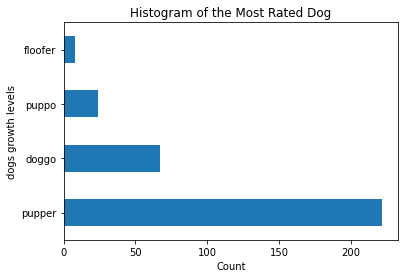

In [97]:
df_dogs_growth = df_merge_archive_image_json.groupby('dogs_growth').filter(lambda x: len(x) <= 250)

df_dogs_growth['dogs_growth'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog growth level')
plt.xlabel('Count')
plt.ylabel('dogs growth levels')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');